<a href="https://colab.research.google.com/github/xlnt415/StockAnalysisInPython/blob/master/MMM/mmm_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
import pandas as pd
import numpy as np

In [86]:
data = pd.read_csv(
    '/content/drive/MyDrive/나스업무/mmm/rawdata/marketing_mix.csv',
    parse_dates = ['Date'],
    index_col = 'Date'
)

1. Paid: 광고주가 유튜브에 비용을 지불하고 광고를 노출시키는 것을 말합니다.
2. Organic: 광고주가 비용을 지불하지 않고, 유튜브 알고리즘에 의해 자연스럽게 노출되는 것을 말합니다.
3. ffiliate channel Views는 제휴 채널 뷰를 의미합니다. 제휴 채널은 다른 웹사이트나 앱에서 광고주의 제품이나 서비스를 홍보하고, 그에 대한 보상을 받는 채널을 말합니다.
4. Overall views는 전체 뷰를 의미합니다. 이는 광고가 노출된 총 횟수를 나타냅니다

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2018-01-07 to 2021-10-31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TikTok      200 non-null    float64
 1   Facebook    200 non-null    float64
 2   Google Ads  200 non-null    float64
 3   Sales       200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [73]:
# data.rename_axis('Date', inplace = True)

In [88]:
data.head()

,TikTok,Facebook,Google Ads,Sales
Date,,,,
2018-01-07,13528.1,0.00,0.00,9779.80
2018-01-14,0.0,5349.65,2218.93,13245.19
2018-01-21,0.0,4235.86,2046.96,12022.66
2018-01-28,0.0,3562.21,0.00,8846.95
2018-02-04,0.0,0.00,2187.29,9797.07


In [95]:
x = data.drop(columns = ['Sales'])
y = data.Sales
# z = data.install_organic

In [96]:
# X = X.div(X.sum(axis = 1), axis = 0)

In [97]:
# X = X.fillna(0)

In [98]:
lr = LinearRegression()

In [99]:
print(cross_val_score(lr, x, y, cv = TimeSeriesSplit()))

[0.69594303 0.69302285 0.66850729 0.78807363 0.73512387]


In [101]:
lr.fit(x, y)

LinearRegression()

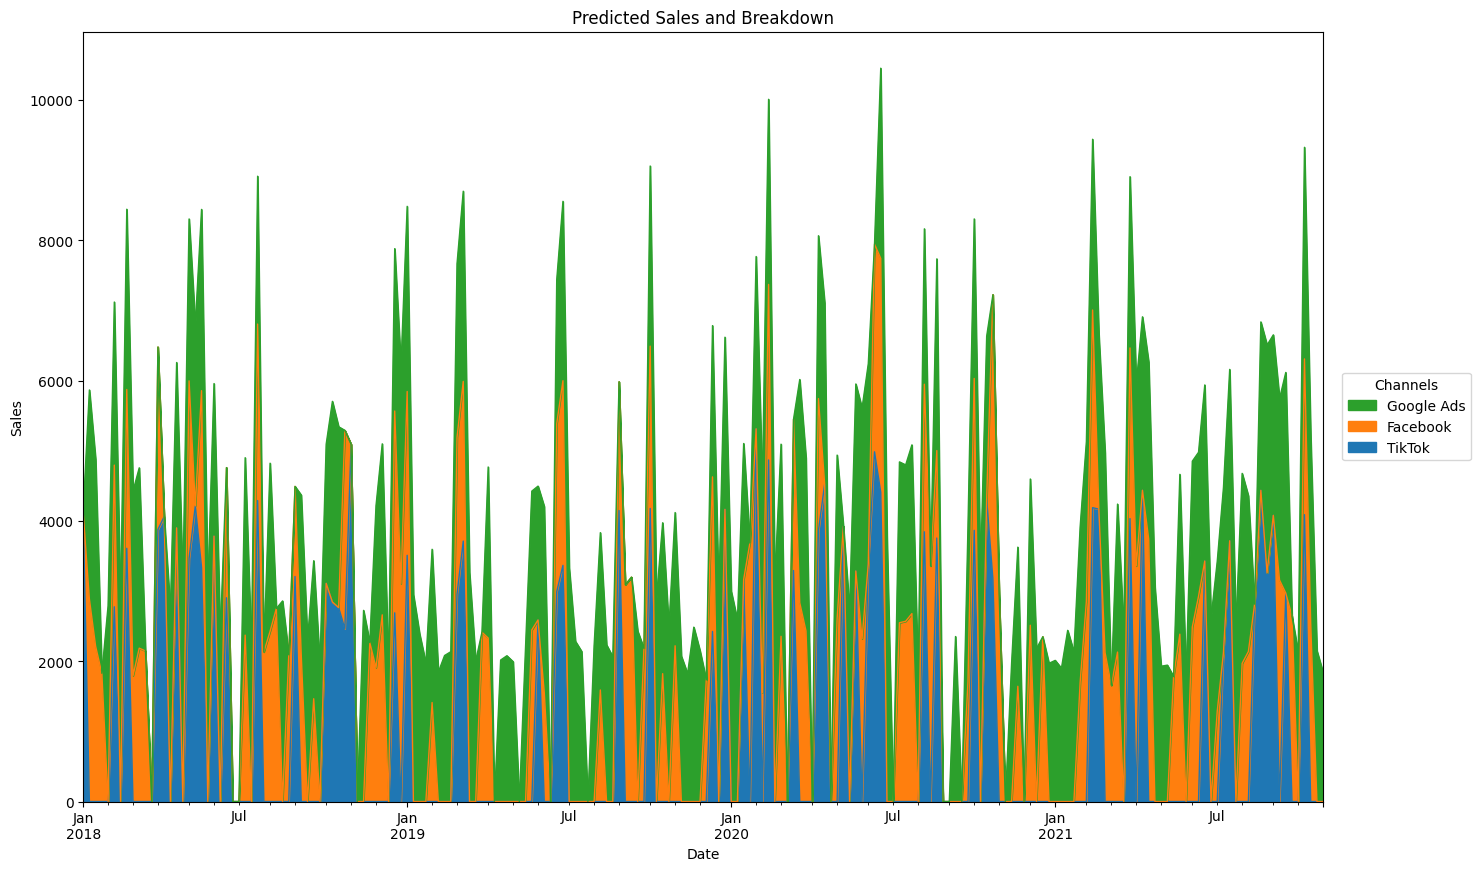

In [103]:
weights = pd.Series(
    lr.coef_,
    index=x.columns
)

base = lr.intercept_

unadj_contributions = x.mul(weights).assign(Base=base)

adj_contributions = (unadj_contributions
                     .div(unadj_contributions.sum(axis=1), axis=0)
                     .mul(y, axis=0)
                    ) # contains all contributions for each day

ax = (adj_contributions[['TikTok',	'Facebook', 'Google Ads']]
      .plot.area(
          figsize=(16, 10),
          linewidth=1,
          title='Predicted Sales and Breakdown',
          ylabel='Sales',
          xlabel='Date')
     )

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1], labels[::-1],
    title='Channels', loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)

In [104]:
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

# 광고를 집행하지 않았을 경우 약 6678원을 판매할 것이다.

Coefficients: [0.35968382 0.48833246 1.2159193 ]
Intercept: 6678.396933606161
